### 파이선 빅 데이터 분석교재 218 page Titanic

In [41]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
plt.rc('font', family='malgun gothic')
plt.rcParams['axes.unicode_minus'] = False

In [42]:
titanic = sns.load_dataset('titanic')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [43]:
# PassengerId: 승객의 고유 식별자.
# Survived: 생존 여부 (0: 사망, 1: 생존).
# Pclass: 티켓의 클래스 또는 객실 등급 (1, 2, 3).
# Name: 승객의 이름.
# Sex: 성별 (male 또는 female).
# Age: 승객의 나이.
# SibSp: 함께 탑승한 형제자매 또는 배우자의 수.
# Parch: 함께 탑승한 부모 또는 자녀의 수.
# Ticket: 티켓 번호.
# Fare: 지불한 운임 요금.
# Cabin: 객실 번호.
# Embarked: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton).

In [44]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [45]:
titanic.to_csv('Data/titanic.csv', index = False)

In [46]:
## 경고 메세지 표시 안하기
import warnings
warnings.filterwarnings(action='ignore')

### Data 전처리

In [47]:
titanic.isnull().sum() #결측갑 확인

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [48]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [49]:
titanic.isnull().sum() #결측갑 확인

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [50]:
titanic['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [51]:
titanic['embarked'] = titanic['embarked'].fillna('S')

In [52]:
titanic['embark_town'].value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [53]:
titanic['embark_town'] = titanic['embark_town'].fillna('Southampton')

In [54]:
titanic['deck'].value_counts()

deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: count, dtype: int64

In [55]:
titanic['deck'] = titanic['deck'].fillna(titanic['deck'].mode().iloc[0]) # 최빈값
titanic.isnull().sum() #결측갑 확인

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [56]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [57]:
titanic.survived.value_counts()

survived
0    549
1    342
Name: count, dtype: int64

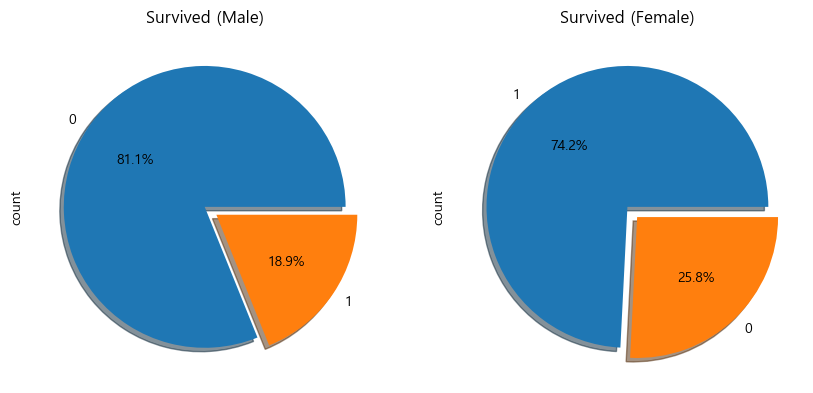

In [58]:
f,ax = plt.subplots(1,2,figsize=(10,5))

titanic['survived'][titanic['sex'] == 'male'].value_counts().plot.pie(explode=[0,0.1], autopct = "%.1f%%", ax=ax[0], shadow = True)
                     
titanic['survived'][titanic['sex'] == 'female'].value_counts().plot.pie(explode=[0,0.1], autopct = "%.1f%%", ax=ax[1], shadow = True)

ax[0].set_title('Survived (Male)')
ax[1].set_title('Survived (Female)')
                                                                       
plt.show()

In [59]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,C,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,C,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


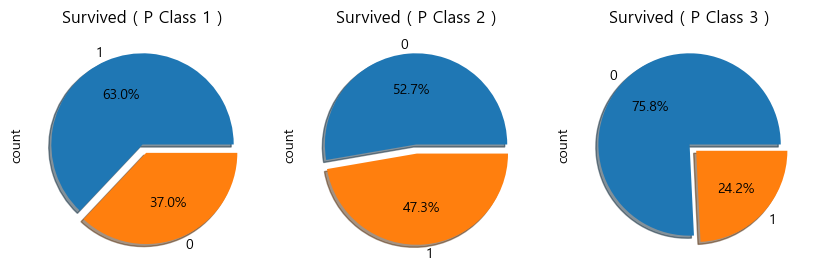

In [60]:
f,ax = plt.subplots(1,3,figsize=(10,5))

titanic['survived'][titanic['pclass'] == 1].value_counts().plot.pie(explode=[0,0.1], autopct = "%.1f%%", ax=ax[0], shadow = True)
titanic['survived'][titanic['pclass'] == 2].value_counts().plot.pie(explode=[0,0.1], autopct = "%.1f%%", ax=ax[1], shadow = True)
titanic['survived'][titanic['pclass'] == 3].value_counts().plot.pie(explode=[0,0.1], autopct = "%.1f%%", ax=ax[2], shadow = True)

ax[0].set_title('Survived ( P Class 1 )')
ax[1].set_title('Survived ( P Class 2 )')
ax[2].set_title('Survived ( P Class 3 )')

plt.show()

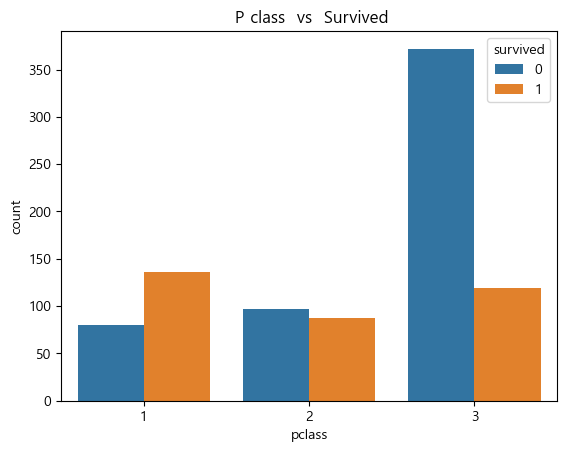

In [61]:
sns.countplot(x='pclass', hue = 'survived', data = titanic)
# 범부형 데이터의 빈도를 막대그래프로 시각화
plt.title(' P class  vs  Survived')
plt.show()

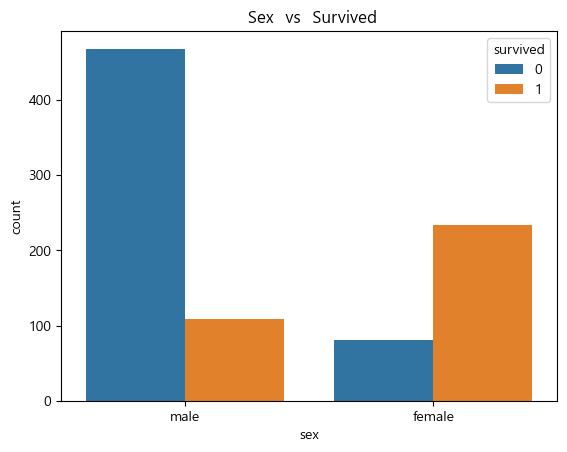

In [62]:
sns.countplot(x='sex', hue = 'survived', data = titanic)
# 범부형 데이터의 빈도를 막대그래프로 시각화
plt.title(' Sex  vs  Survived')
plt.show()

### 데이터 모델링

In [63]:
titanic_corr = titanic.corr(numeric_only=True) #method=pearson 생략(Default)
titanic_corr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.247704,0.171647
sibsp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.247704,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.171647,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [64]:
titanic_corr.to_csv('Data/titanic_corr.csv')

In [65]:
titanic['survived'].corr(titanic['adult_male'])

-0.5570800422053258

### 시각화

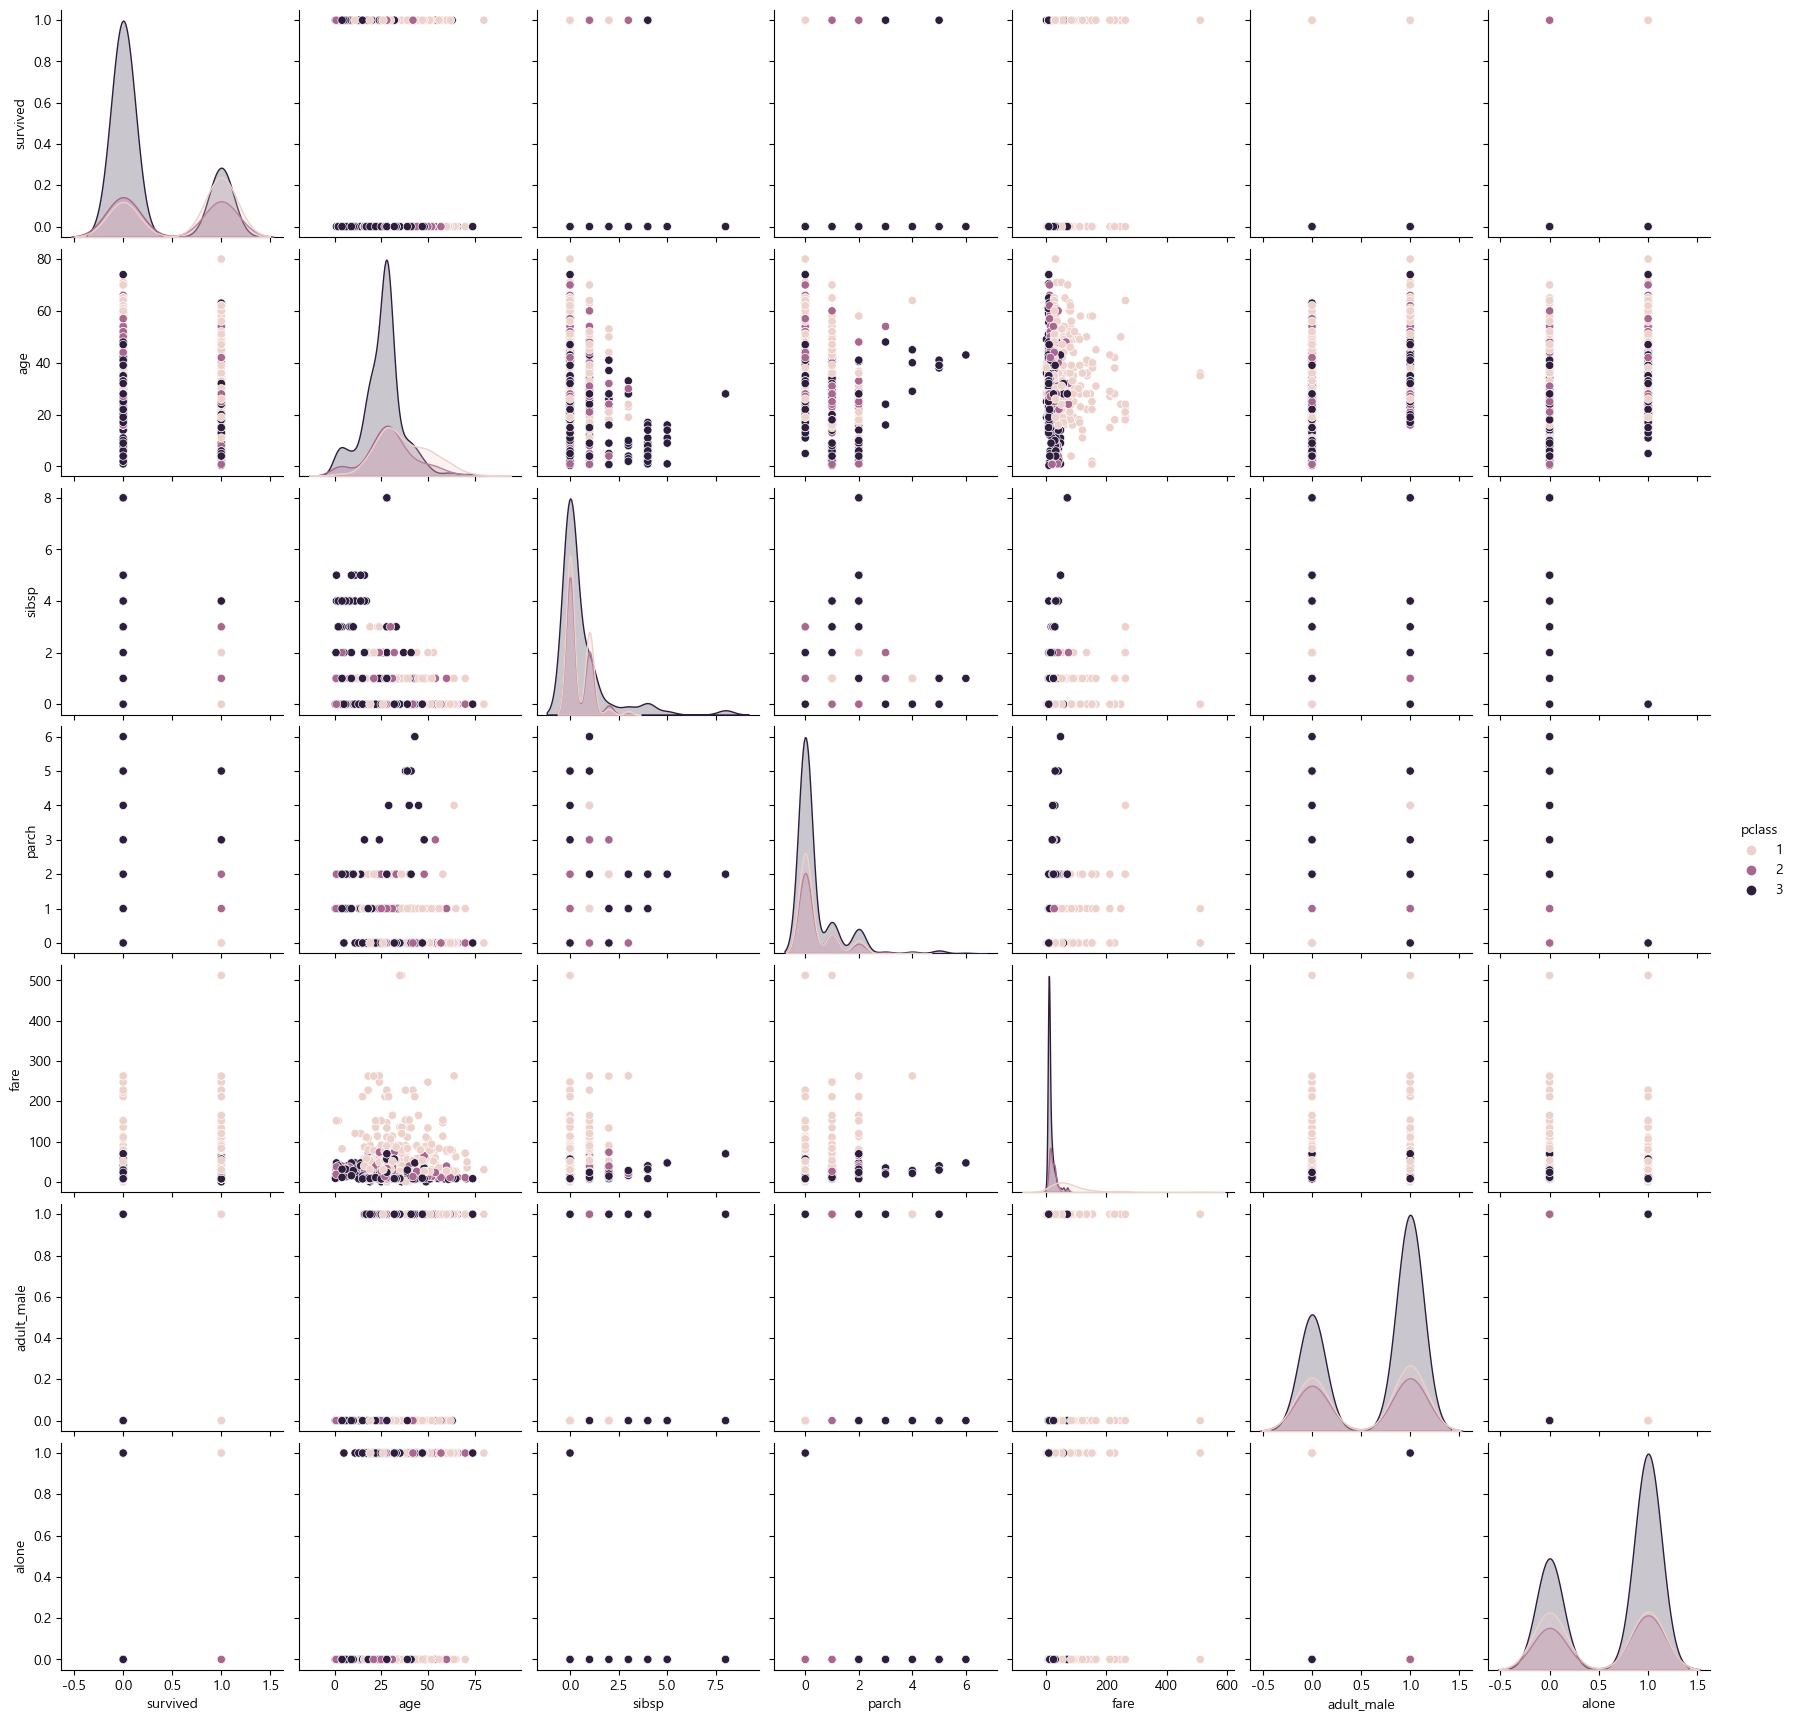

In [66]:
sns.pairplot(titanic, hue = 'pclass')
plt.show()

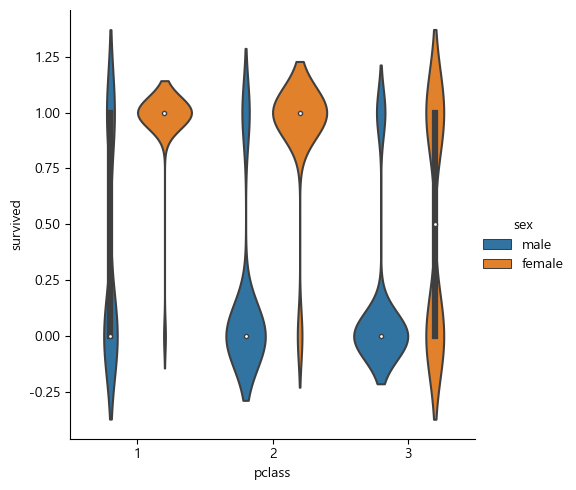

In [67]:
sns.catplot(x='pclass', y='survived', hue = 'sex', data = titanic, kind='violin')
plt.show()

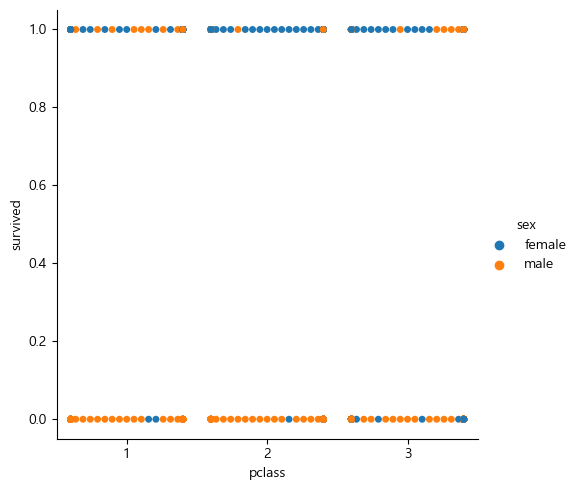

In [68]:
sns.catplot(x='pclass', y='survived', hue = 'sex', data = titanic, kind='swarm')
plt.show()

In [72]:
def category_age(x):
    if x < 10:    
        return 0
    elif x < 20 :
        return 1
    elif x < 30 :
        return 2
    elif x < 40 :
        return 3
    elif x < 50 :
        return 4
    elif x < 60 :
        return 5
    elif x < 70 :
        return 6
    else:
        return 7
    
titanic['age2'] = titanic['age'].apply(category_age)
#함수를 이용하여 age2 column 추가

In [73]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3


In [74]:
titanic['sex'] = titanic['sex'].map({'male' : 1, 'female' : 0})
# 성별을 1,0 으로 Replace

In [75]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3


In [76]:
titanic['family'] = titanic['sibsp'] + titanic['parch'] +1
# family 수 Column 추가 (총 인원)

In [77]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [82]:
titanic.to_csv('Data/titanic3_corr.csv', index=False)

In [79]:
heatmap_data = titanic[['survived','sex','age2','family','pclass','fare']]

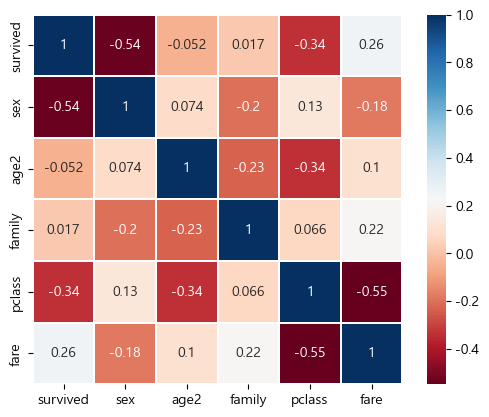

In [83]:
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, square = True, cmap='RdBu', linecolor='white', annot=True)
plt.show()
#astype은 type을 바꾼다 (실수, 정수 Data type을 모두 float으로 바꾼다